In [2]:
pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.8 MB 2.8 MB/s eta 0:00:04
   ----- ---------------------------------- 1.3/9.8 MB 3.4 MB/s eta 0:00:03
   ----- ---------------------------------- 1.3/9.8 MB 3.4 MB/s eta 0:00:03
   -------- ------------------------------- 2.1/9.8 MB 2.5 MB/s eta 0:00:04
   ---------- ----------------------------- 2.6/9.8 MB 2.5 MB/s eta 0:00:03
   -------------- ------------------------- 3.7/9.8 MB 2.8 MB/s eta 0:00:03
   ------------------ --------------------- 4.5/9.8 MB 2.9 MB/s eta 0:00:02
   --------------------- ------------------ 5.2/9.8 MB 3.1 MB/s eta 0:00:02
   ----------------------- ---------------- 5.8/9.8 MB 3.1 MB/s eta 0:00:02
   --------------------------- ------------ 6.8/9.8 MB 3.2 MB/s eta 0:00:01
   ------------------------------ --------- 7.6/9.8 MB 3.3 MB/s eta 0:00:01
   ---------------------------------- ----- 8.4/9.8 MB 3.3 MB/s eta 0:00:01
   ----------------


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
# Load library/package
import os
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy.stats import shapiro

# Sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Statmodels
import statsmodels
import statsmodels.api as sm



In [29]:
# Load data
df = pd.read_csv("diabetes.csv", usecols=["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age","Outcome"])
# Display 5 data teratas
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,NaN,72.0,35.0,0.0,NaN,0.627,NaN,1
1,1.0,85.0,66.0,29.0,0.0,NaN,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,NaN,40.0,35.0,168.0,43.1,NaN,33.0,1


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               691 non-null    float64
 1   Glucose                   653 non-null    float64
 2   BloodPressure             614 non-null    float64
 3   SkinThickness             730 non-null    float64
 4   Insulin                   576 non-null    float64
 5   BMI                       538 non-null    float64
 6   DiabetesPedigreeFunction  691 non-null    float64
 7   Age                       614 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [31]:
kategorikal = df.select_dtypes(include='object').columns
kategorikal

Index([], dtype='object')

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in kategorikal:
  df[i] = le.fit_transform(df[i])

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               691 non-null    float64
 1   Glucose                   653 non-null    float64
 2   BloodPressure             614 non-null    float64
 3   SkinThickness             730 non-null    float64
 4   Insulin                   576 non-null    float64
 5   BMI                       538 non-null    float64
 6   DiabetesPedigreeFunction  691 non-null    float64
 7   Age                       614 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [34]:
df.nunique()

Pregnancies                  17
Glucose                     135
BloodPressure                44
SkinThickness                51
Insulin                     160
BMI                         220
DiabetesPedigreeFunction    483
Age                          52
Outcome                       2
dtype: int64

In [35]:
# Melakukan analisa deskriptif
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,691.0,3.803184,3.333891,0.000,1.0000,3.000,6.0000,17.000
Glucose,653.0,120.462481,31.941336,0.000,99.0000,116.000,140.0000,199.000
BloodPressure,614.0,68.959283,19.768892,0.000,62.0000,72.000,80.0000,114.000
SkinThickness,730.0,20.520548,15.845282,0.000,0.0000,23.000,32.0000,99.000
Insulin,576.0,76.878472,107.629279,0.000,0.0000,36.000,120.5000,680.000
BMI,538.0,31.993680,7.945932,0.000,27.1000,32.150,36.3000,67.100
DiabetesPedigreeFunction,691.0,0.465363,0.317771,0.078,0.2385,0.365,0.6265,2.329
Age,614.0,33.166124,11.825889,21.000,24.0000,29.000,40.0000,81.000
Outcome,768.0,0.348958,0.476951,0.000,0.0000,0.000,1.0000,1.000


In [36]:
# Check missing value
df.isna().sum()

Pregnancies                  77
Glucose                     115
BloodPressure               154
SkinThickness                38
Insulin                     192
BMI                         230
DiabetesPedigreeFunction     77
Age                         154
Outcome                       0
dtype: int64

In [37]:
# Cek duplicate
duplicate = df[df.duplicated()]
duplicate

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [38]:
# Cek ukuran data apakah duplicate sudah terhapus
df.shape

(768, 9)

In [39]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [40]:
x = df.drop(columns='Insulin')
y = df['Insulin']

In [41]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")  
x = imputer.fit_transform(x)              

In [46]:
lr = LinearRegression()
lr.fit(x,y)
y_hat = lr.predict(x)
print('MSE :', mean_squared_error(y, y_hat))
print('R-square :', r2_score(y, y_hat))

MSE : 6903.403458975426
R-square : 0.2040317071303317


In [47]:
df.shape

(768, 9)

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [49]:
x_train.shape, x_test.shape

((614, 8), (154, 8))

In [50]:
lr.fit(x_train, y_train)
y_hat = lr.predict(x_test)
print('MSE :', mean_squared_error(y_test, y_hat))
print('R-square :', r2_score(y_test, y_hat))

MSE : 6374.964898855976
R-square : 0.17572426709175404


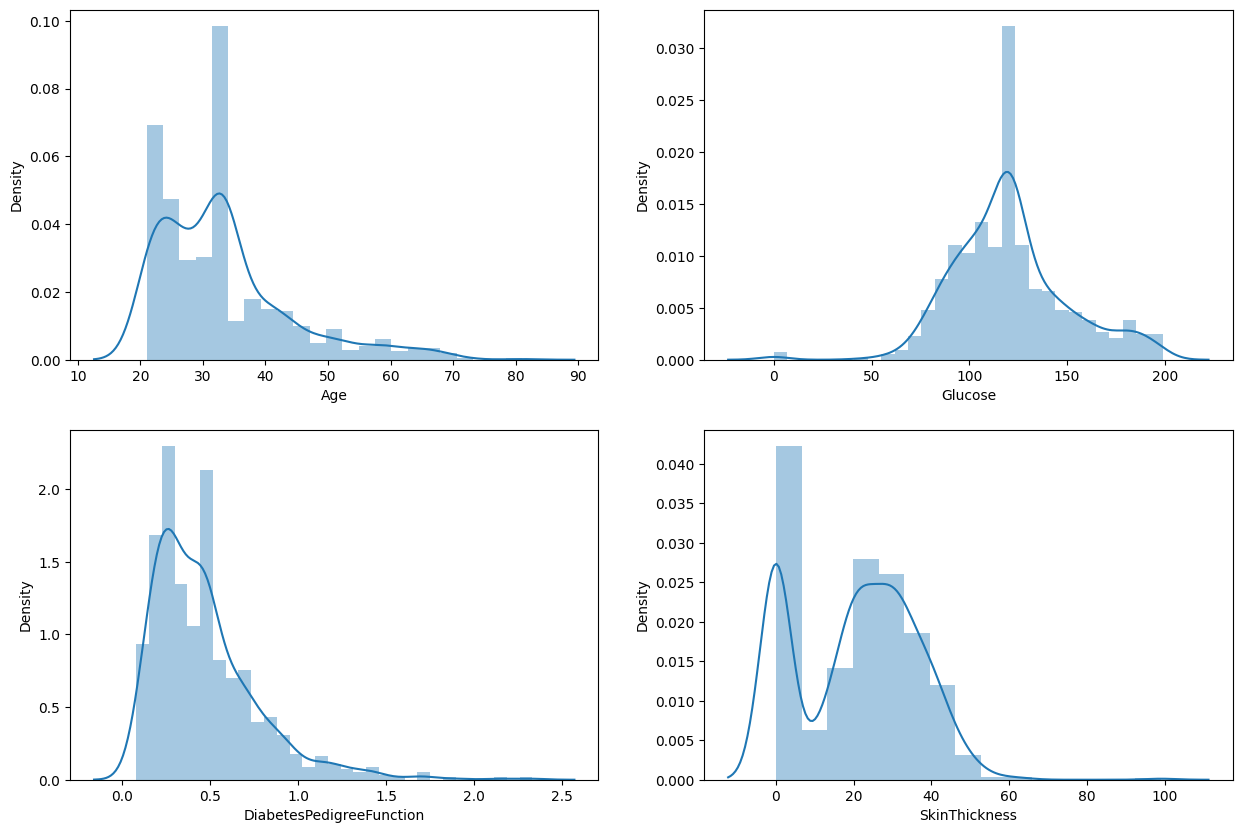

In [58]:
# Cek normalitas data dengan histogram
warnings.filterwarnings('ignore')
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.distplot(df["Age"], ax=axes[0, 0])
sns.distplot(df["Glucose"], ax=axes[0, 1])
sns.distplot(df["DiabetesPedigreeFunction"], ax=axes[1, 0])
sns.distplot(df["SkinThickness"], ax=axes[1, 1])
plt.show()

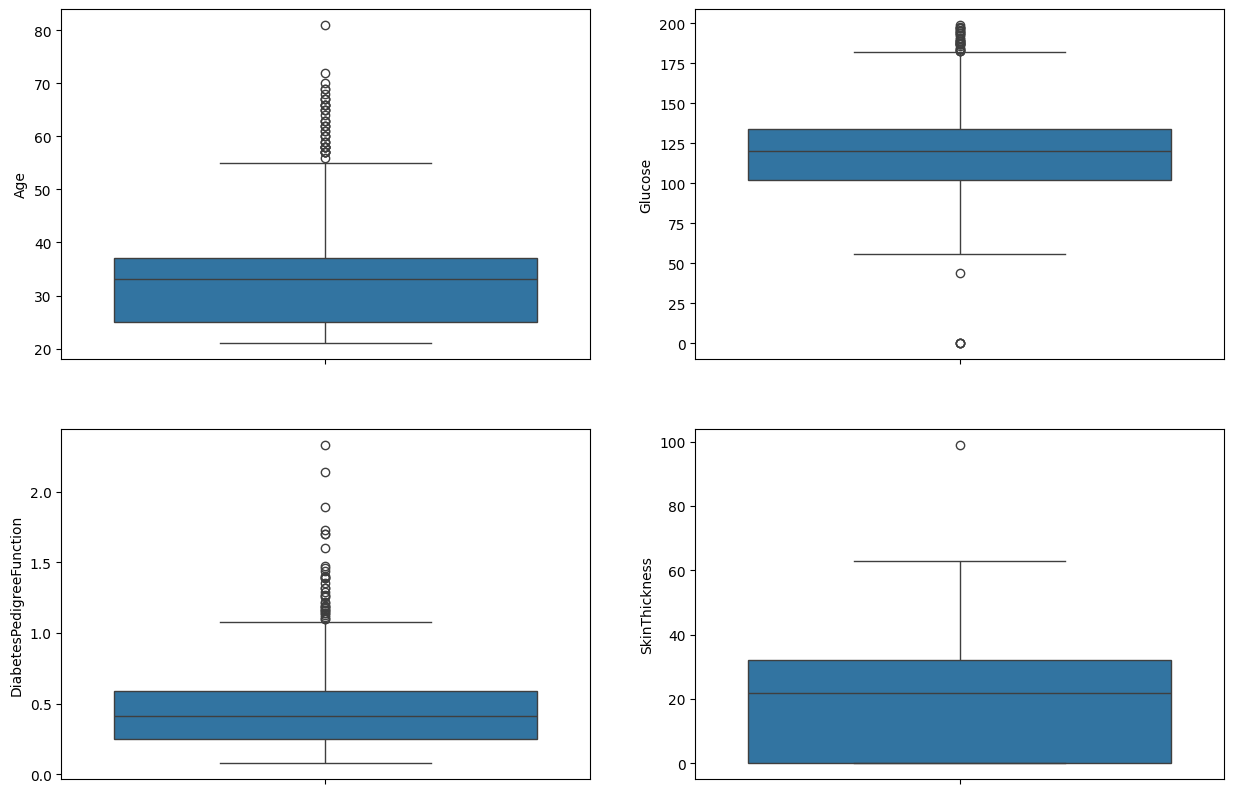

In [59]:
# Cek normalitas data dengan boxplot
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.boxplot(df["Age"], ax=axes[0, 0])
sns.boxplot(df["Glucose"], ax=axes[0, 1])
sns.boxplot(df["DiabetesPedigreeFunction"], ax=axes[1, 0])
sns.boxplot(df["SkinThickness"], ax=axes[1, 1])
plt.show()

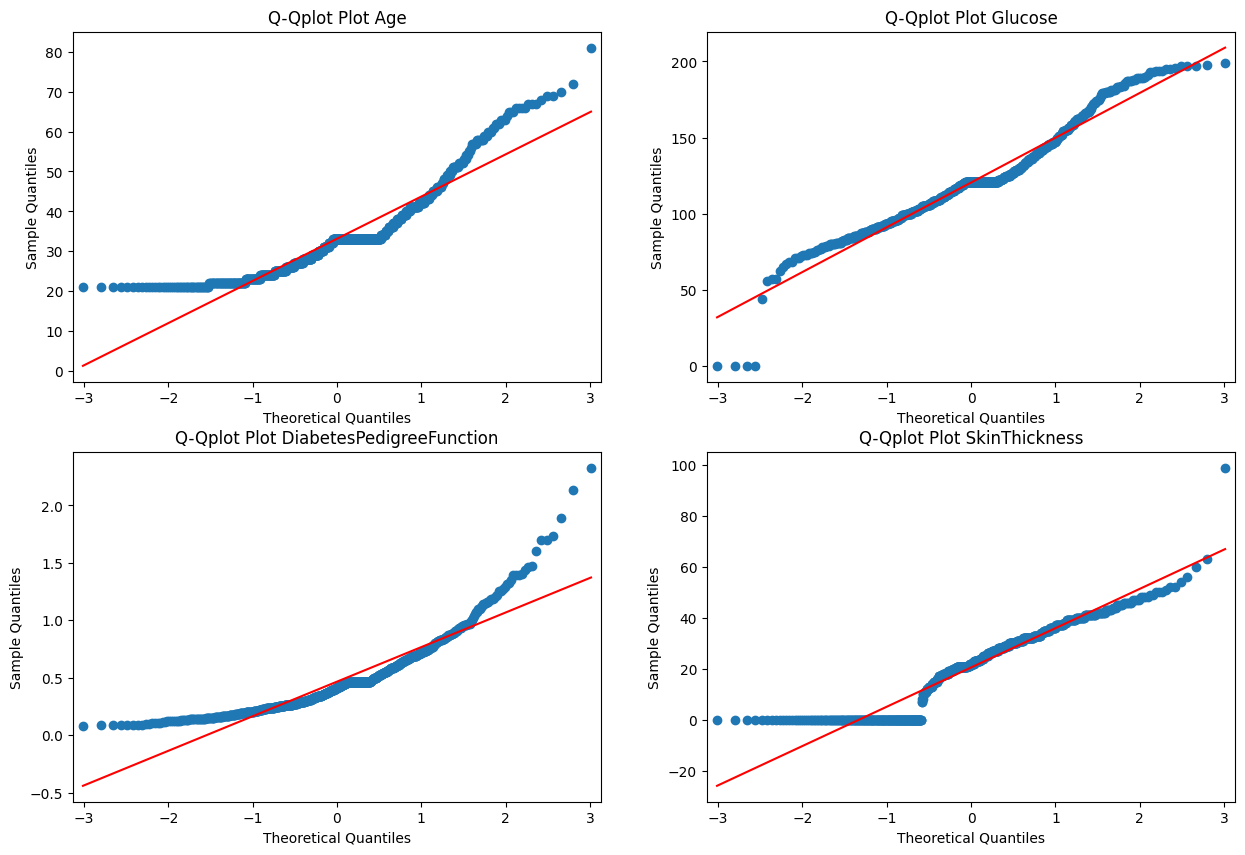

In [61]:
# Cek normalitas data dengan Q-Q plot
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sm.graphics.qqplot(df["Age"].dropna(), line='s', ax=axes[0, 0])
axes[0, 0].title.set_text('Q-Qplot Plot Age')

sm.graphics.qqplot(df["Glucose"].dropna(), line='s', ax=axes[0, 1])
axes[0, 1].title.set_text('Q-Qplot Plot Glucose')

sm.graphics.qqplot(df["DiabetesPedigreeFunction"].dropna(), line='s', ax=axes[1, 0])
axes[1, 0].title.set_text('Q-Qplot Plot DiabetesPedigreeFunction')

sm.graphics.qqplot(df["SkinThickness"].dropna(), line='s', ax=axes[1, 1])
axes[1, 1].title.set_text('Q-Qplot Plot SkinThickness')

plt.show()

In [62]:
 #Cek Normalitas dengan Uji Shapiro-Wilk
column = df.columns

for i in column:
  stat, p = shapiro(df[i])
  print('Statistics=%.3f, p=%.3f' % (stat, p))
  # Pengujian Hipotesis
  alpha = 0.05
  if p > alpha:
    print('Gagal Tolak H0, {} berdistribusi normal'.format(i))
  else:
    print('Tolak H0, {} tidak berdistribusi normal'.format(i))

Statistics=0.910, p=0.000
Tolak H0, Pregnancies tidak berdistribusi normal
Statistics=0.960, p=0.000
Tolak H0, Glucose tidak berdistribusi normal
Statistics=0.779, p=0.000
Tolak H0, BloodPressure tidak berdistribusi normal
Statistics=0.912, p=0.000
Tolak H0, SkinThickness tidak berdistribusi normal
Statistics=0.750, p=0.000
Tolak H0, Insulin tidak berdistribusi normal
Statistics=0.890, p=0.000
Tolak H0, BMI tidak berdistribusi normal
Statistics=0.859, p=0.000
Tolak H0, DiabetesPedigreeFunction tidak berdistribusi normal
Statistics=0.873, p=0.000
Tolak H0, Age tidak berdistribusi normal
Statistics=0.603, p=0.000
Tolak H0, Outcome tidak berdistribusi normal


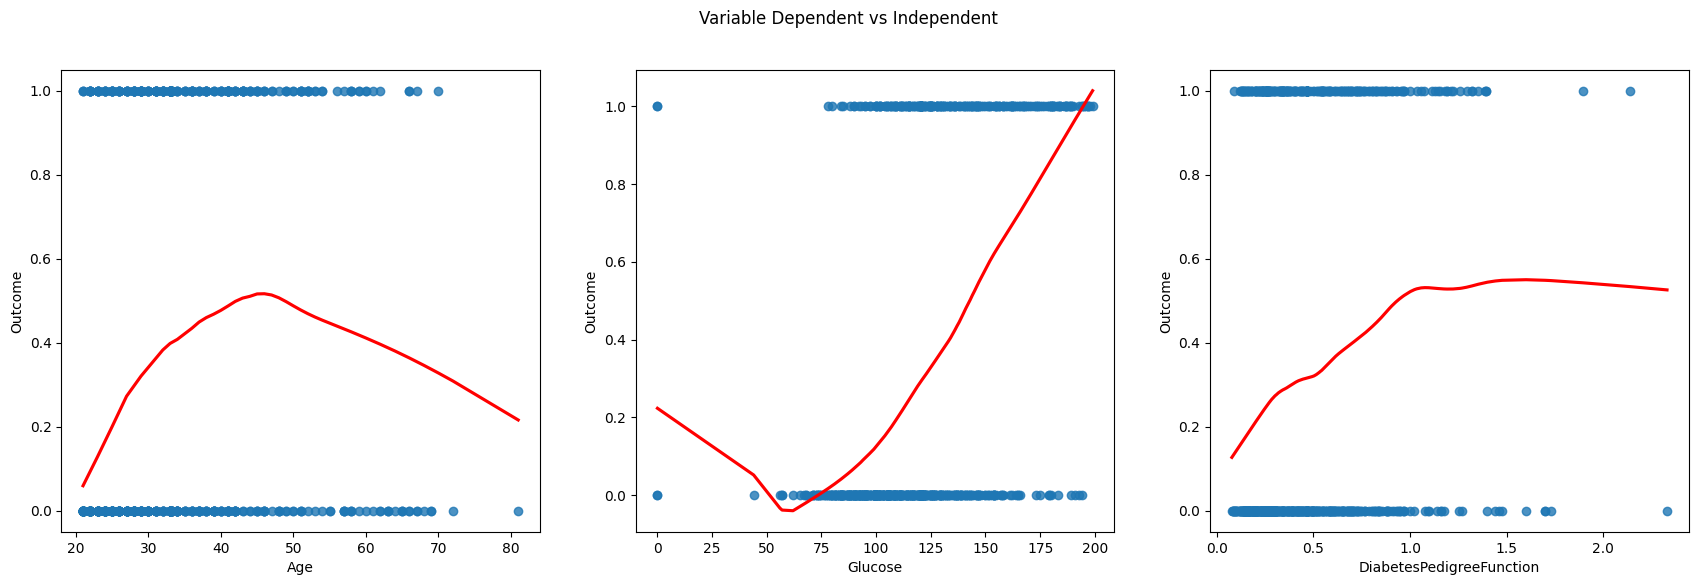

In [65]:
# Keterkaitan x dengan y
fig, axes = plt.subplots(1, 3, figsize=(21, 6))
fig.suptitle('Variable Dependent vs Independent')

sns.regplot(x=df["Age"], y=df["Outcome"], lowess=True, line_kws={'color': 'red'}, ax=axes[0])
sns.regplot(x=df["Glucose"], y=df["Outcome"], lowess=True, line_kws={'color': 'red'}, ax=axes[1])
sns.regplot(x=df["DiabetesPedigreeFunction"], y=df["Outcome"], lowess=True, line_kws={'color': 'red'}, ax=axes[2])
plt.show()

In [66]:
# Cek Normalitas dengan Uji Shapiro-Wilk
column = df.columns

for i in column:
  stat, p = shapiro(df[i])
  print('Statistics=%.3f, p=%.3f' % (stat, p))
  # Pengujian Hipotesis
  alpha = 0.05
  if p > alpha:
    print('Gagal Tolak H0, {} berdistribusi normal'.format(i))
  else:
    print('Tolak H0, {} tidak berdistribusi normal'.format(i))

Statistics=0.910, p=0.000
Tolak H0, Pregnancies tidak berdistribusi normal
Statistics=0.960, p=0.000
Tolak H0, Glucose tidak berdistribusi normal
Statistics=0.779, p=0.000
Tolak H0, BloodPressure tidak berdistribusi normal
Statistics=0.912, p=0.000
Tolak H0, SkinThickness tidak berdistribusi normal
Statistics=0.750, p=0.000
Tolak H0, Insulin tidak berdistribusi normal
Statistics=0.890, p=0.000
Tolak H0, BMI tidak berdistribusi normal
Statistics=0.859, p=0.000
Tolak H0, DiabetesPedigreeFunction tidak berdistribusi normal
Statistics=0.873, p=0.000
Tolak H0, Age tidak berdistribusi normal
Statistics=0.603, p=0.000
Tolak H0, Outcome tidak berdistribusi normal


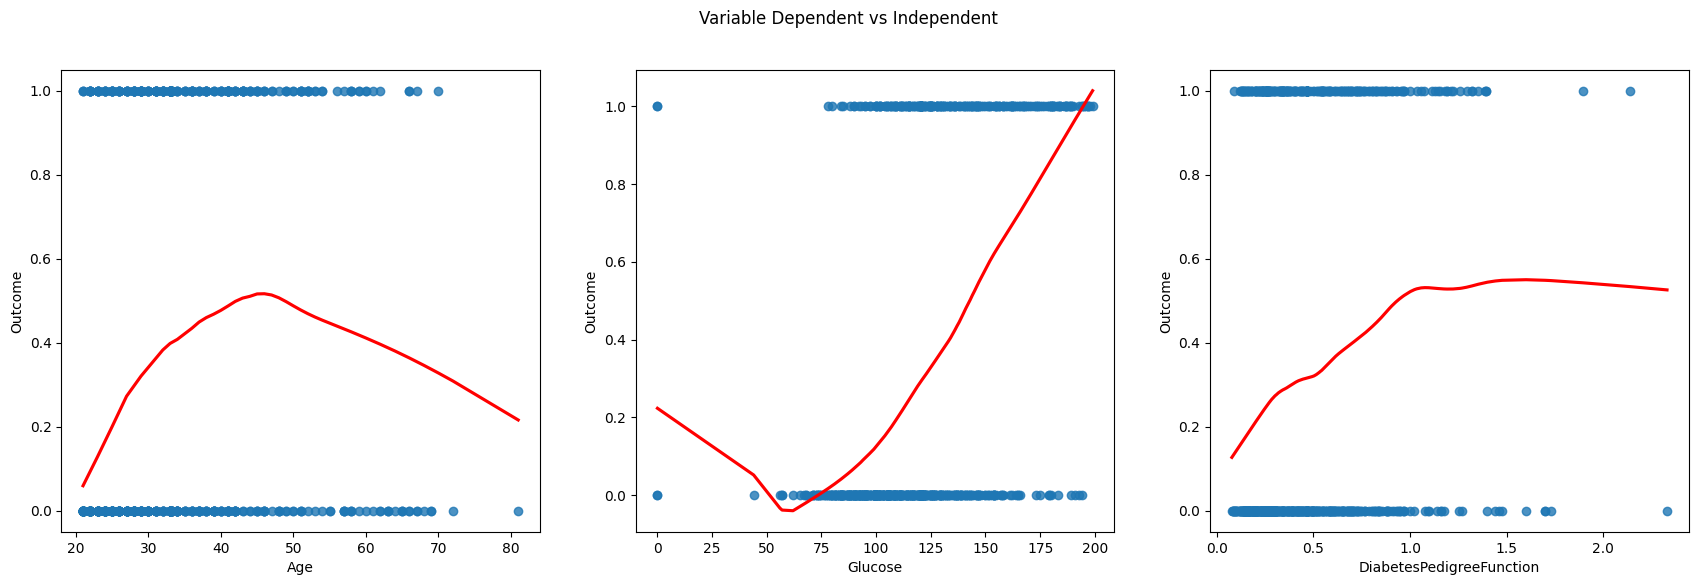

In [69]:
# Keterkaitan x dengan y
fig, axes = plt.subplots(1, 3, figsize=(21, 6))
fig.suptitle('Variable Dependent vs Independent')

sns.regplot(x=df["Age"], y=df["Outcome"], lowess=True, line_kws={'color': 'red'}, ax=axes[0])
sns.regplot(x=df["Glucose"], y=df["Outcome"], lowess=True, line_kws={'color': 'red'}, ax=axes[1])
sns.regplot(x=df["DiabetesPedigreeFunction"], y=df["Outcome"], lowess=True, line_kws={'color': 'red'}, ax=axes[2])
plt.show()

<Axes: >

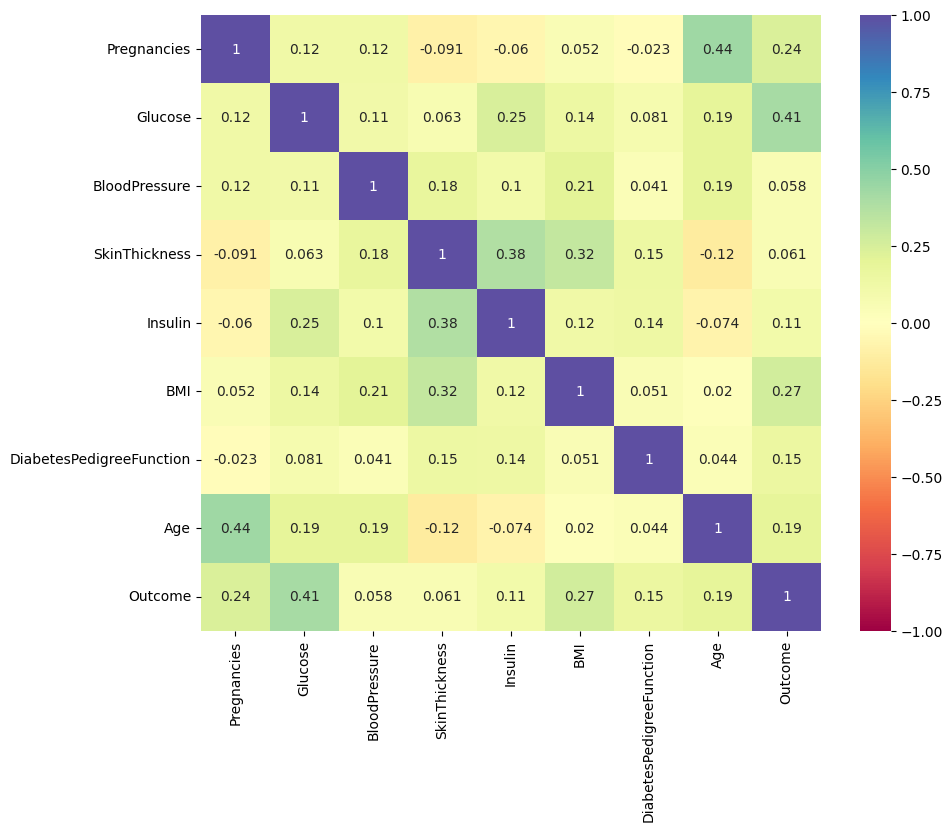

In [71]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), vmax=1, vmin=-1, center=0, cmap="Spectral", annot=True)

In [73]:
# Cek Urutan korelasi terendah ke tertinggi
korelasi = df.corr()["Outcome"].sort_values()
korelasi

BloodPressure               0.057655
SkinThickness               0.061280
Insulin                     0.105471
DiabetesPedigreeFunction    0.150244
Age                         0.189426
Pregnancies                 0.238629
BMI                         0.265770
Glucose                     0.411253
Outcome                     1.000000
Name: Outcome, dtype: float64

In [74]:
# Scale data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)
scaled_df

array([[ 6.95181759e-01,  4.82863000e-16,  1.72164649e-01, ...,
         5.36639459e-01,  0.00000000e+00,  1.36589591e+00],
       [-8.87066579e-01, -1.20496059e+00, -1.67553920e-01, ...,
        -3.79689798e-01, -2.05021714e-01, -7.32120209e-01],
       [ 1.32808109e+00,  2.12492878e+00, -2.80793442e-01, ...,
         6.86040968e-01, -1.10372592e-01,  1.36589591e+00],
       ...,
       [ 3.78732091e-01,  1.82640743e-02,  1.72164649e-01, ...,
        -7.31613353e-01, -2.99670837e-01, -7.32120209e-01],
       [-8.87066579e-01,  1.88156389e-01, -5.07272488e-01, ...,
         0.00000000e+00,  1.30936424e+00,  1.36589591e+00],
       [-8.87066579e-01, -9.33132888e-01,  8.04615204e-16, ...,
        -4.99211005e-01, -9.62214692e-01, -7.32120209e-01]])

In [75]:
# Membuat dataframe dari hasil scalling
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.695182,4.828630e-16,1.721646e-01,0.937927,-0.825507,-5.346983e-16,0.536639,0.000000,1.365896
1,-0.887067,-1.204961e+00,-1.675539e-01,0.549268,-0.825507,-5.346983e-16,-0.379690,-0.205022,-0.732120
2,1.328081,2.124929e+00,-2.807934e-01,-1.329247,-0.825507,-1.308435e+00,0.686041,-0.110373,1.365896
3,-0.887067,-1.069047e+00,-1.675539e-01,0.160610,0.183848,-5.860152e-01,-0.990576,-1.151513,-0.732120
4,-1.203516,4.828630e-16,-1.639668e+00,0.937927,0.978447,1.671548e+00,0.000000,-0.015723,1.365896
...,...,...,...,...,...,...,...,...,...
763,1.960980,-6.613052e-01,3.986437e-01,1.780020,1.107301,1.364049e-01,-0.977296,0.000000,-0.732120
764,-0.570617,5.224254e-02,5.892513e-02,0.419716,-0.825507,7.233713e-01,-0.416210,-0.583618,-0.732120
765,0.378732,1.826407e-02,1.721646e-01,0.160610,0.000000,-8.719732e-01,-0.731613,-0.299671,-0.732120
766,-0.887067,1.881564e-01,-5.072725e-01,-1.329247,-0.825507,-2.850068e-01,0.000000,1.309364,1.365896


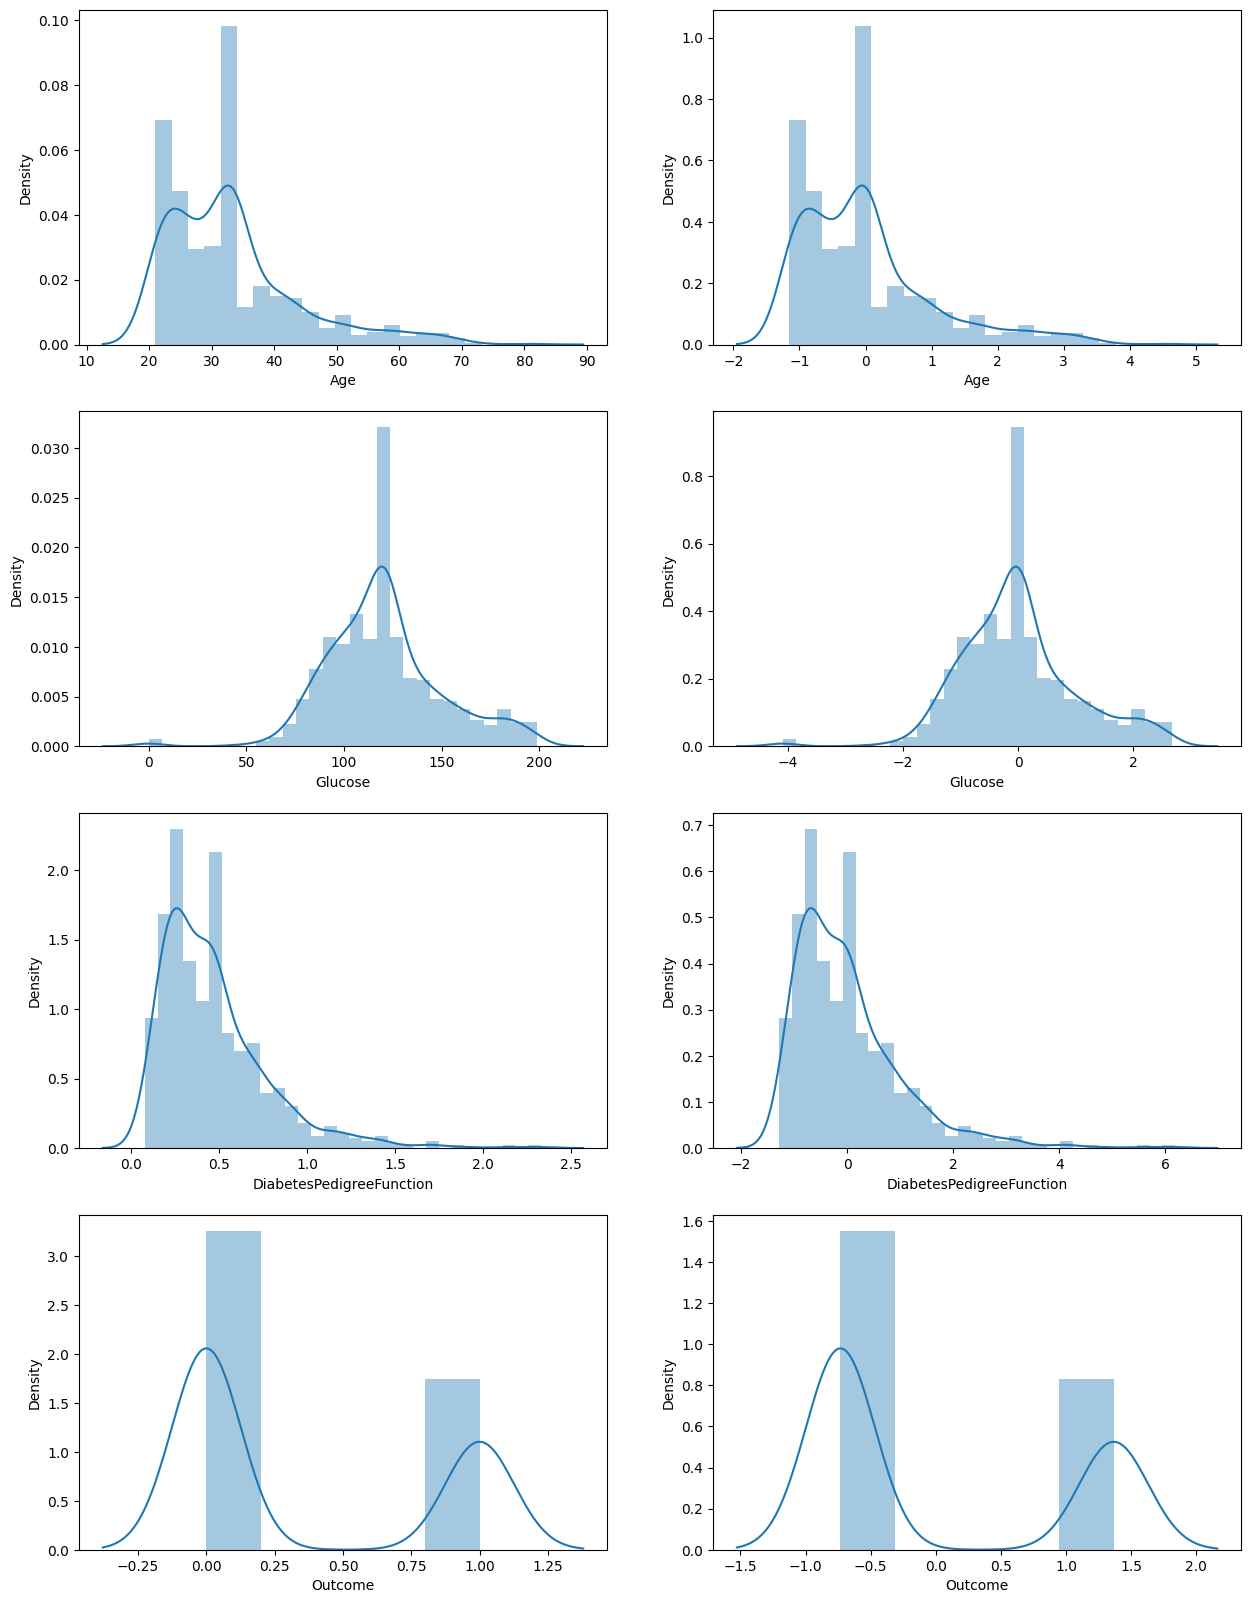

In [76]:
# Plot variabel sebelum dan sesudah scaling
fig, axes = plt.subplots(4, 2, figsize=(15, 20))

sns.distplot(df["Age"], ax=axes[0, 0])
sns.distplot(scaled_df["Age"], ax=axes[0, 1])
sns.distplot(df["Glucose"], ax=axes[1, 0])
sns.distplot(scaled_df["Glucose"], ax=axes[1, 1])
sns.distplot(df["DiabetesPedigreeFunction"], ax=axes[2, 0])
sns.distplot(scaled_df["DiabetesPedigreeFunction"], ax=axes[2, 1])
sns.distplot(df["Outcome"], ax=axes[3, 0])
sns.distplot(scaled_df["Outcome"], ax=axes[3, 1])
plt.show()

In [77]:
X = scaled_df.drop("Outcome", axis=1).values
y = scaled_df["Outcome"].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [78]:
print("Ukuran X train ", len(X_train))
print("Ukuran X test ", len(X_test))
print("Ukuran y train ", len(y_train))
print("Ukuran y test ", len(y_test))

Ukuran X train  537
Ukuran X test  231
Ukuran y train  537
Ukuran y test  231


In [79]:
# Masukkan intercepts secara manual
Input = sm.add_constant(X_train)

In [80]:
# Modelling dengan statsmodels
SimpleModel = sm.OLS(y_train, Input, missing='drop')
results = SimpleModel.fit()

In [81]:
# Print results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     22.35
Date:                Fri, 08 Nov 2024   Prob (F-statistic):           1.90e-29
Time:                        16:48:53   Log-Likelihood:                -687.84
No. Observations:                 537   AIC:                             1394.
Df Residuals:                     528   BIC:                             1432.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.038      0.497      0.6

In [82]:
print('coefficient of determination:', results.rsquared)
print('adjusted coefficient of determination:', results.rsquared_adj)
print('regression coefficients:', results.params)

coefficient of determination: 0.25298905059524734
adjusted coefficient of determination: 0.24167070287699355
regression coefficients: [ 0.01889239  0.11705815  0.33921561 -0.05432043  0.02044967 -0.01363031
  0.22570707  0.09096288  0.09503447]


In [83]:
# membuat list
list_columns = []

for i in df.columns:
  if i != "Outcome":
    list_columns.append(i)

In [84]:

list_columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [85]:
# Membuat Prediksi Model
Input_test = sm.add_constant(X_test)
prediction_1 = results.predict(Input_test)

# Tampilkan dalam bentuk dataframe
df_statsmod = pd.DataFrame(X_test, columns=list_columns)
df_statsmod["actual_price"] = y_test
df_statsmod["prediction_price"] = prediction_1
df_statsmod.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,actual_price,prediction_price
0,-0.887067,2.668584,3.986437e-01,1.456138,0.000000,1.641447e+00,3.083105,-1.056864,1.365896,1.378898
1,-0.570617,-0.457434,2.854042e-01,0.614045,0.248275,2.417579e-01,-0.203728,-0.962215,-0.732120,-0.264811
2,0.062282,-1.510767,-3.940330e-01,-1.329247,-0.825507,3.019595e-01,-0.246888,-0.772916,-0.732120,-0.508576
3,0.378732,1.547295,8.046152e-16,-0.098496,0.000000,-9.321749e-01,0.403838,1.687961,1.365896,0.572829
4,-1.203516,-0.321521,-2.241737e-01,-1.329247,-0.825507,-5.346983e-16,0.646201,-0.205022,-0.732120,-0.195511


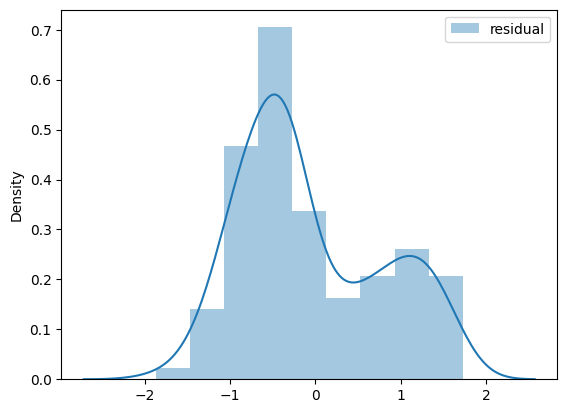

In [86]:
# Melihat distribusi residual
residual1 = df_statsmod['actual_price'] - df_statsmod['prediction_price']
sns.distplot(residual1, label="residual")
plt.legend()
plt.show()

In [87]:
# Uji Normalitas pada Residual
stat, p = shapiro(residual1)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# Pengujian Hipotesis
alpha = 0.05
if p > alpha:
  print('Gagal Tolak H0, residual berdistribusi normal')
else:
  print('Tolak H0, residual tidak berdistribusi normal')

Statistics=0.935, p=0.000
Tolak H0, residual tidak berdistribusi normal


In [88]:
# Memasukkan residual kedalam dataframe
df_statsmod["residual"] = residual1
df_statsmod.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,actual_price,prediction_price,residual
0,-0.887067,2.668584,3.986437e-01,1.456138,0.000000,1.641447e+00,3.083105,-1.056864,1.365896,1.378898,-0.013002
1,-0.570617,-0.457434,2.854042e-01,0.614045,0.248275,2.417579e-01,-0.203728,-0.962215,-0.732120,-0.264811,-0.467309
2,0.062282,-1.510767,-3.940330e-01,-1.329247,-0.825507,3.019595e-01,-0.246888,-0.772916,-0.732120,-0.508576,-0.223544
3,0.378732,1.547295,8.046152e-16,-0.098496,0.000000,-9.321749e-01,0.403838,1.687961,1.365896,0.572829,0.793067
4,-1.203516,-0.321521,-2.241737e-01,-1.329247,-0.825507,-5.346983e-16,0.646201,-0.205022,-0.732120,-0.195511,-0.536609


<function matplotlib.pyplot.show(close=None, block=None)>

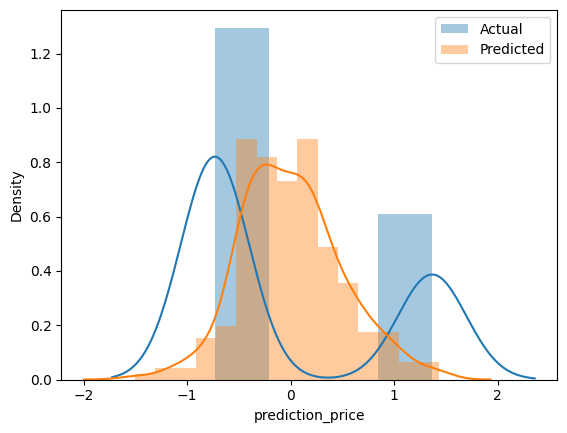

In [89]:
# Melihat perbedaan actual dan prediksi
sns.distplot(df_statsmod['actual_price'], label="Actual")
sns.distplot(df_statsmod['prediction_price'], label="Predicted")
plt.legend()
plt.show

In [90]:
statsmodels.stats.stattools.durbin_watson(results.resid, axis=0)

np.float64(1.9259142660981028)

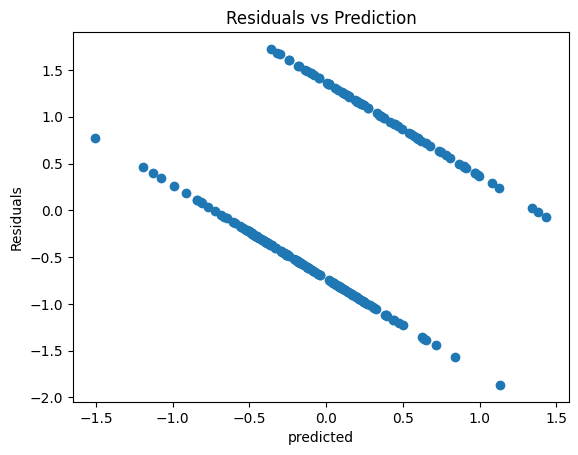

In [100]:
asm_homosk = plt.scatter(df_statsmod['prediction_price'], df_statsmod["residual"])
plt.xlabel('predicted')
plt.ylabel('Residuals')
asm_homosk = plt.title('Residuals vs Prediction')

In [97]:
# R-square
print('R-square :', metrics.r2_score(df_statsmod['actual_price'], df_statsmod['prediction_price']))

R-square : 0.27149687980034853


In [98]:
# MSE
print('MSE :', metrics.mean_squared_error(df_statsmod['actual_price'], df_statsmod['prediction_price']))

MSE : 0.6981624231005051


In [102]:
print(len(results.tvalues))  
print(results.tvalues)    
t_test_const = results.tvalues[0]
t_test_X1 = results.tvalues[1]
t_test_X2 = results.tvalues[2]




9
[ 0.49725758  2.87375875  8.43238951 -1.32517704  0.46363701 -0.32016375
  5.60735206  2.29910422  2.20934268]


In [110]:

print("Jumlah elemen p-values:", len(results.pvalues))
print("Nilai p-values:", results.pvalues)

p_values = results.pvalues

if len(p_values) > 0:
    print("P-value const:", p_values[0])
if len(p_values) > 1:
    print("P-value X1:", p_values[1])
if len(p_values) > 2:
    print("P-value X2:", p_values[2])
if len(p_values) > 3:
    print("P-value X3:", p_values[3])


Jumlah elemen p-values: 9
Nilai p-values: [6.19214417e-01 4.21957570e-03 3.24992935e-16 1.85685592e-01
 6.43098898e-01 7.48970861e-01 3.31634497e-08 2.18885495e-02
 2.75792967e-02]
P-value const: 0.6192144165561745
P-value X1: 0.0042195757006171005
P-value X2: 3.2499293544899024e-16
P-value X3: 0.18568559227942966
